<a href="https://colab.research.google.com/github/vieclov/itt-szkolenie-git/blob/main/%5BJPiA%5D_Zadanie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Następnie proszę przeprowadzić analizę polegającą na:
1. Narysowaniu wykresu temperatury, opadów oraz ciśnienia dla wybranego
okresu w formie wykresu punktowego.
2. Interpolowaniu punktów na wykresie za pomocą trzech wybranych metod
wbudowanych w bibliotekę scipy oraz metody Lagrange'a.
3. Aproksymowaniu przebiegu temperatury wybraną funkcją, która Państwa
zdaniem najlepiej odzwierciedla przebieg.
4. Przeanalizowaniu okresowości przebiegu czasowego temperatury, ciśnienia i
opadów w całym zakresie czasowym badanego okresu za pomocą FFT.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate 
# from scipy.interpolate import interp1d
# from scipy.interpolate import griddata
from scipy.fft import fft
from sympy import *

Definicja interpolacji Lagrange'a

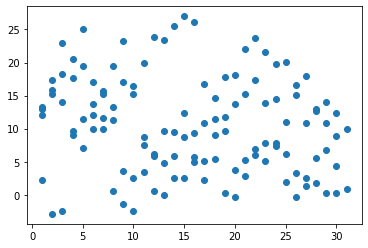

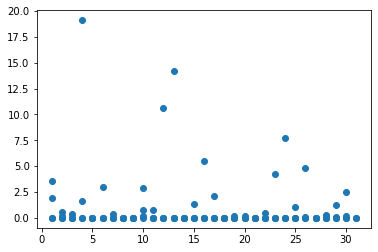

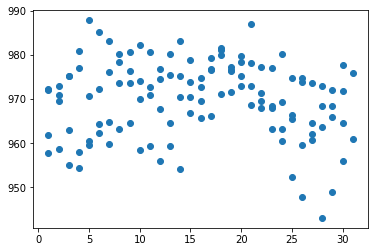

<Figure size 432x288 with 0 Axes>

In [6]:
df = pd.read_csv(r'[JPiA]Zadanie3.csv',sep=",")
x = []
m = np.array(df['m'])
d = np.array(df['d'])
h = np.array(df['h'])
t = np.array(df['t'])
p = np.array(df['p'])
r = np.array(df['r'])
# df['d'] = pd.to_datetime(df.d, format='%m,%d')
# d = df['d']
# a = np.array(df['a'])

for i in range(0,len(d)):
    x.append(i)


plt.scatter(d,t)
fig1 = plt.figure()

plt.scatter(d,r)
fig2 = plt.figure()

plt.scatter(d,p)
fig3 = plt.figure()

In [8]:
def lagrange_interpolation(x,y,xx):
  n =len(x)
  sum=0
  for i in range(n):
    product = y[i]
    for j in range(n):
      if (i != j):
        product = product*(xx - x[j])/(x[i]-x[j])
      sum=sum+ product
    return sum

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:513: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1


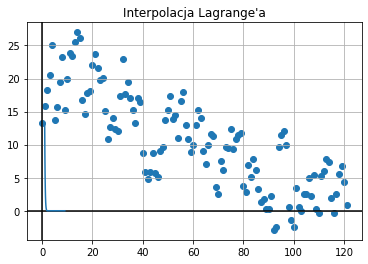

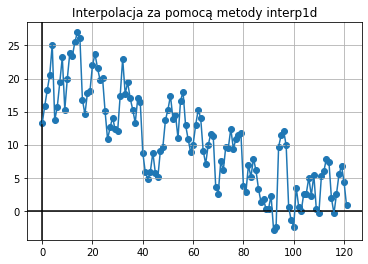

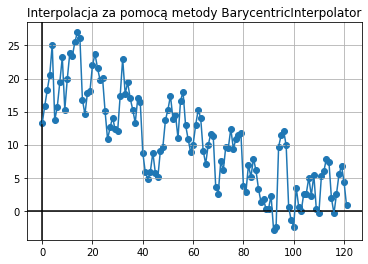

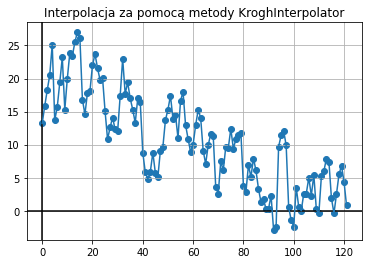

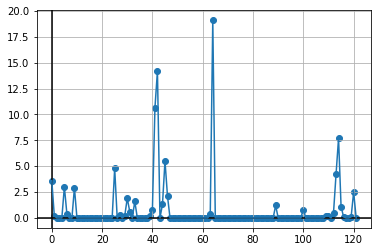

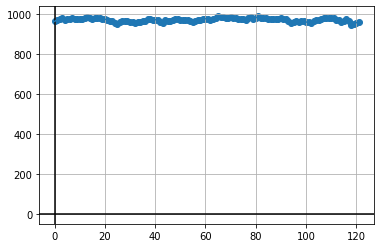

<Figure size 432x288 with 0 Axes>

In [9]:
from scipy import interpolate
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import KroghInterpolator


#temperatura 
#1. Interpolacja Lagrange'a

plt.scatter(x,t)
xx = np.linspace(1, 9, 100)
yy = [lagrange_interpolation(x,t,i) for i in xx]
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(xx,yy)
plt.title("Interpolacja Lagrange'a")
fig1 = plt.figure()

#2. metody z scipy

plt.scatter(x,t)
xx = np.linspace(1, 9, 100)
yy = interpolate.interp1d(x,d)
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(x,t)
plt.title("Interpolacja za pomocą metody interp1d")
fig2 = plt.figure()


plt.scatter(x,t)
xx = np.linspace(1, 9, 100)
yy = BarycentricInterpolator(x,d)
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(x,t)
plt.title("Interpolacja za pomocą metody BarycentricInterpolator")
fig2 = plt.figure()


plt.scatter(x,t)
xx = np.linspace(1, 9, 100)
yy = KroghInterpolator(x,d)
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(x,t)
plt.title("Interpolacja za pomocą metody KroghInterpolator")
fig2 = plt.figure()



# # #opady

plt.scatter(x,r)
xx = np.linspace(1, 9, 100)
yy = [lagrange_interpolation(x,r,i) for i in xx]
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(x,r)
fig2 = plt.figure()

# #ciśnienie

plt.scatter(x,p)
xx = np.linspace(1, 9, 100)
yy = [lagrange_interpolation(x,p,i) for i in xx]
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.plot(x,p)
fig3 = plt.figure()

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


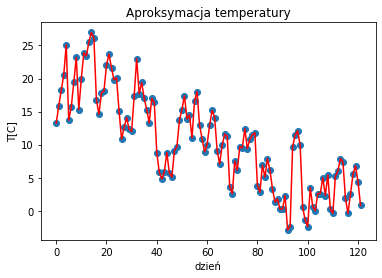

In [10]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return t
x=np.arange(0,122,1)
y=t

fit_params=curve_fit(func, x,y)
plt.scatter(x,y)
plt.plot(x, func(x, *fit_params), "r")
plt.title('Aproksymacja temperatury')
plt.ylabel('T[C]')
plt.xlabel('dzień')
plt.show()

Transformata Fouriera


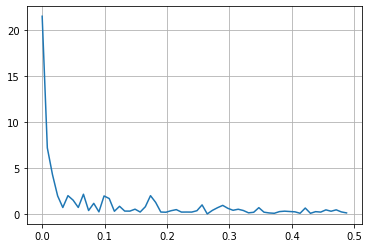

In [13]:
from scipy.fft import fft

tt=np.linspace(0,120,120)
def TransformataFouriera(tt,y):
    N=len(tt)
    dt=tt[1]-tt[0]
    yf=2.0/N*np.abs(fft(y)[0:N //2])
    xf=np.fft.fftfreq(N, d=dt)[0:N //2]
    return xf, yf
xf,yf=TransformataFouriera(tt, t)
plt.plot(xf,yf)
plt.grid()
plt.show()


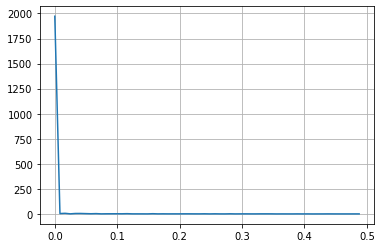

In [15]:
tt=np.linspace(0,120,120)

xf,yf = TransformataFouriera(tt,p)
plt.plot(xf,yf)
plt.grid()
plt.show()

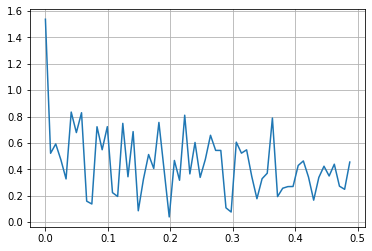

In [16]:
tt=np.linspace(0,120,120)

xf,yf = TransformataFouriera(tt,r)
plt.plot(xf,yf)
plt.grid()
plt.show()